<a href="https://colab.research.google.com/github/Vishveshwar08188/Brain-Tumor-Detection-Using-MRI-Scans-Activation-function/blob/main/Brain_Tumor_Detection_Using_MRI_Scans_Activation_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brain Tumor Detection Using MRI Scans Activation function

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


data_dir = "/content/Brain.zip"


datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


def build_model(activation_function):
    model = Sequential([
        Conv2D(32, (3,3), activation=activation_function, input_shape=(150, 150, 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation=activation_function),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation=activation_function),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


activations = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']
histories = {}
results = {}

for act in activations:
    print(f"\nTraining with Activation Function: {act}")
    model = build_model(act)
    history = model.fit(train_gen, validation_data=val_gen, epochs=5, verbose=1)
    val_acc = history.history['val_accuracy'][-1]
    results[act] = round(val_acc * 100, 2)
    histories[act] = history.history

# Print accuracy results
print("\nActivation Function-wise Validation Accuracy:")
for act, acc in results.items():
    print(f"{act}: {acc}%")


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.

Training with Activation Function: relu


D:\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.6420 - loss: 1.0173 - val_accuracy: 0.7400 - val_loss: 0.5037
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.8686 - loss: 0.3987 - val_accuracy: 0.7800 - val_loss: 0.5108
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.8805 - loss: 0.3582 - val_accuracy: 0.8000 - val_loss: 0.5217
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.8922 - loss: 0.3217 - val_accuracy: 0.8200 - val_loss: 0.4764
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.8902 - loss: 0.2531 - val_accuracy: 0.8000 - val_loss: 0.5081

Training with Activation Function: sigmoid
Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.5984 - loss: 2.0552 - val_accuracy: 0.6200 - val_loss: 2.2725
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 287ms/step - accuracy: 0.6192 - loss: 2.2201 - val_accuracy: 0.6200 - val_loss: 2.1104
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.6741 - loss: 1.833

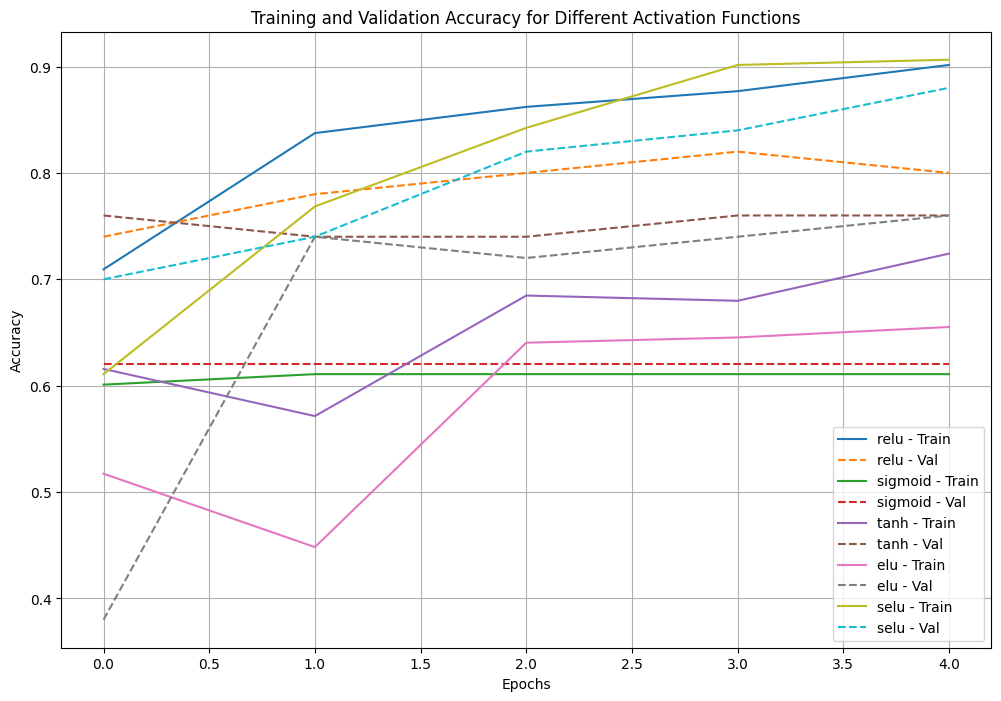

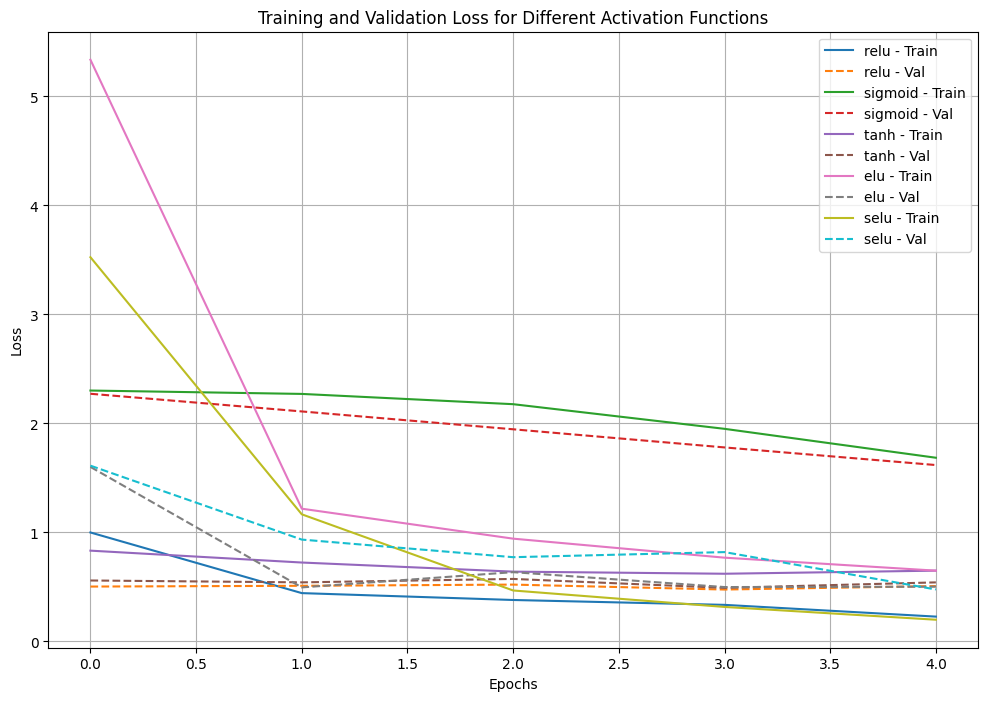

In [ ]:
# Plot the training and validation accuracy for each activation function
plt.figure(figsize=(12, 8))
for act in activations:
    plt.plot(histories[act]['accuracy'], label=f'{act} - Train')
    plt.plot(histories[act]['val_accuracy'], label=f'{act} - Val', linestyle='--')

plt.title("Training and Validation Accuracy for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot the training and validation loss for each activation function
plt.figure(figsize=(12, 8))
for act in activations:
    plt.plot(histories[act]['loss'], label=f'{act} - Train')
    plt.plot(histories[act]['val_loss'], label=f'{act} - Val', linestyle='--')

plt.title("Training and Validation Loss for Different Activation Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import glob

# Use images from the 'no' folder (normal brain scans)
normal_images_path = os.path.join(data_dir, 'no', '*')
normal_image_files = glob.glob(normal_images_path)

# Load and preprocess images
def load_and_preprocess(image_path):
    img = load_img(image_path, target_size=(150, 150))
    img = img_to_array(img) / 255.0
    return img

normal_images = np.array([load_and_preprocess(img_path) for img_path in normal_image_files])

print("Loaded normal images shape:", normal_images.shape)


Loaded normal images shape: (98, 150, 150, 3)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

input_img = Input(shape=(150, 150, 3))

# ENCODER
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)      # (150,150,32)
x = MaxPooling2D((2, 2), padding='same')(x)                               # (75,75,32)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)              # (75,75,16)
encoded = MaxPooling2D((2, 2), padding='same')(x)                         # (38,38,16)

# DECODER
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)        # (38,38,16)
x = UpSampling2D((2, 2))(x)                                               # (76,76,16)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)              # (76,76,32)
x = UpSampling2D((2, 2))(x)                                               # (152,152,32)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='valid')(x)     # (150,150,3)

# Model define & compile
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 75, 75, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 38, 38, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 38, 38, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 76, 76, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 76, 76, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 152, 152, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 150, 150, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,347 (52.14 KB)

 Trainable params: 13,347 (52.14 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_auto = autoencoder.fit(
    normal_images, normal_images,
    epochs=20,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - loss: 0.1393 - val_loss: 0.1312
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - loss: 0.1323 - val_loss: 0.1222
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - loss: 0.1193 - val_loss: 0.1150
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - loss: 0.1149 - val_loss: 0.1136
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 0.1149 - val_loss: 0.1059
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.1034 - val_loss: 0.0962
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - loss: 0.0922 - val_loss: 0.0853
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - loss: 0.0802 - val_loss: 0.0707
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - loss: 0.0623 - val_loss: 0.0537
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.0454 - val_loss: 0.0405
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - loss: 0.0319 - val_loss: 0.0334
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - loss: 0.0266 - val_lo

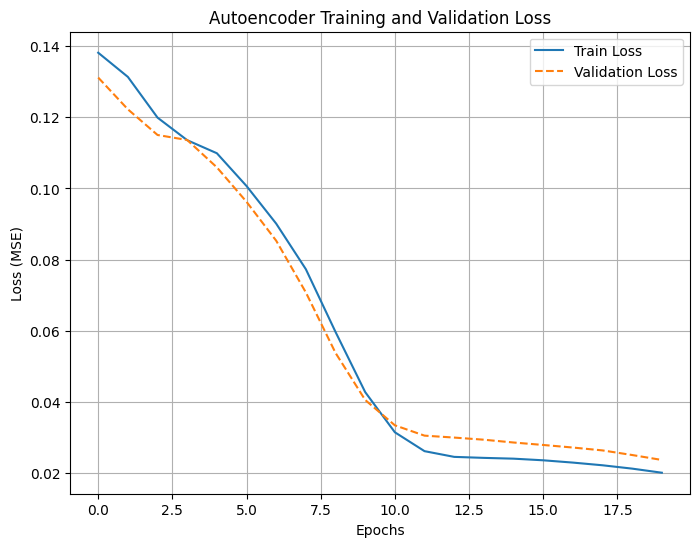

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(history_auto.history['loss'], label='Train Loss')
plt.plot(history_auto.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title("Autoencoder Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()


Loaded tumor images shape: (155, 150, 150, 3)
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step 


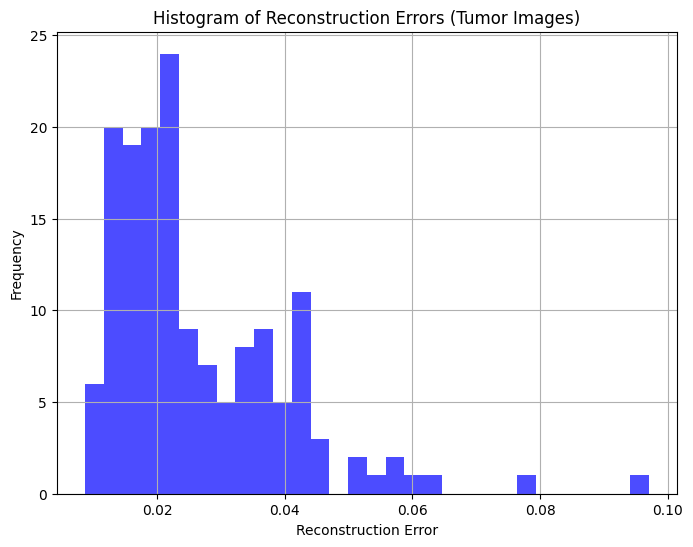

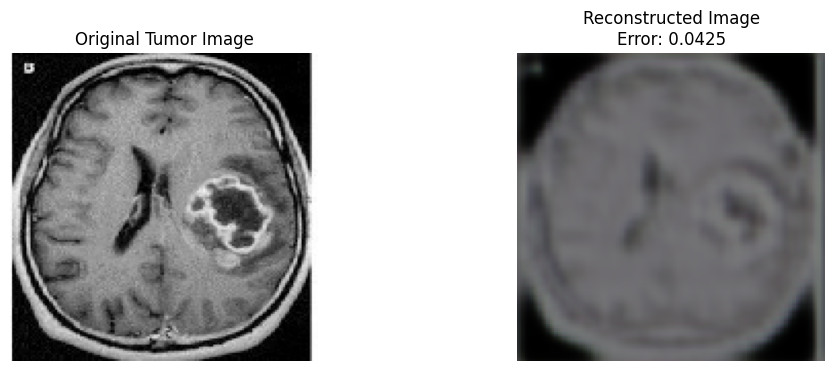

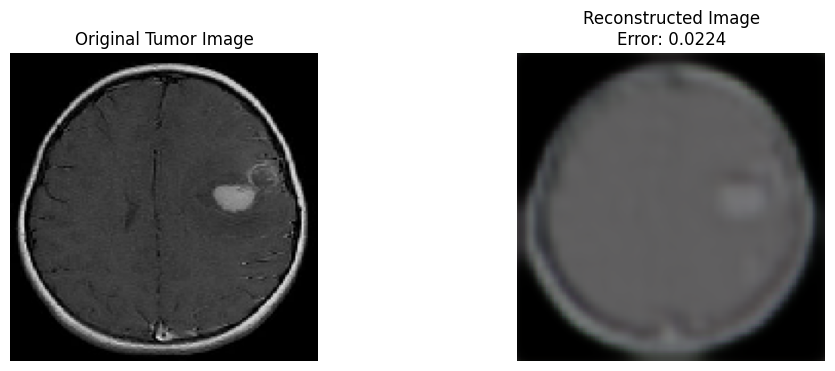

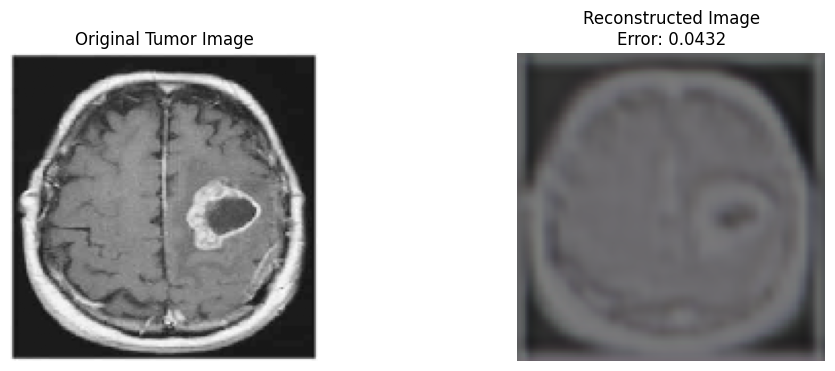

In [ ]:
# Use images from the 'yes' folder (tumor images)
tumor_images_path = os.path.join(data_dir, 'yes', '*')
tumor_image_files = glob.glob(tumor_images_path)

tumor_images = np.array([load_and_preprocess(img_path) for img_path in tumor_image_files])
print("Loaded tumor images shape:", tumor_images.shape)

# Get reconstructed images from autoencoder
reconstructions = autoencoder.predict(tumor_images)

# Compute reconstruction error for each image
reconstruction_errors = np.mean(np.square(tumor_images - reconstructions), axis=(1,2,3))

# Plot histogram of reconstruction errors
plt.figure(figsize=(8,6))
plt.hist(reconstruction_errors, bins=30, alpha=0.7, color='blue')
plt.title("Histogram of Reconstruction Errors (Tumor Images)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Optionally, display a few examples with high reconstruction error
num_examples = 3
import random
indices = random.sample(range(len(tumor_images)), num_examples)

for idx in indices:
    plt.figure(figsize=(12,4))
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(tumor_images[idx])
    plt.title("Original Tumor Image")
    plt.axis('off')
    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(reconstructions[idx])
    plt.title(f"Reconstructed Image\nError: {reconstruction_errors[idx]:.4f}")
    plt.axis('off')
    plt.show()
